In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
import matplotlib.font_manager as fm
mlt.rc("font", family = "NanumBarunGothic")
font_path = "C:/Program Files (x86)/Naver/NanumFont/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = font_path, size = 15, style='normal', weight='bold')
fontprop_1 = fm.FontProperties(fname = font_path, size = 11)

W:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
W:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


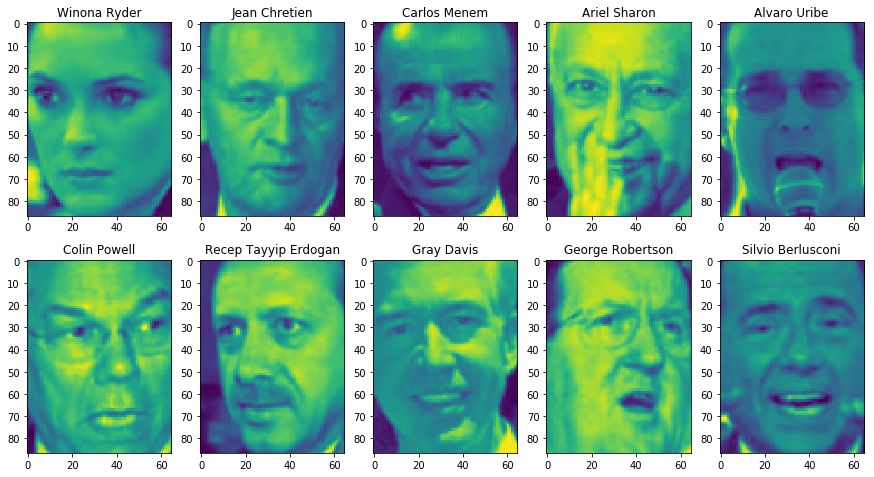

In [21]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

fig, axes = plt.subplots(2, 5 ,figsize = (15, 8))
image_shape = people.images[0].shape

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [4]:
print("people.images.shape: ", people.images.shape)
print("클래스 개수: ", len(people.target_names))

people.images.shape:  (3023, 87, 65)
클래스 개수:  62


In [5]:
counts = np.bincount(people.target)

for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count), end = "    ")
    if (i +1) % 3 == 0:
        print()


Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [6]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 소수점 2번째 자리까지
print("1-최근접 이웃의 테스트 세트점수(KNN): {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트점수(KNN): 0.23


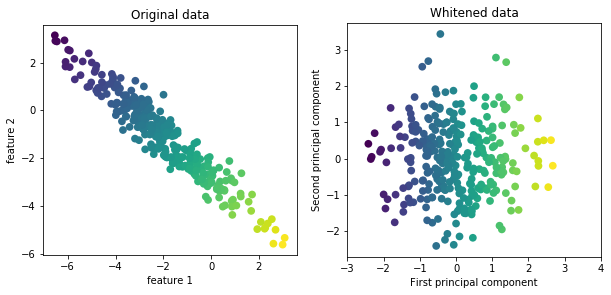

In [8]:
mglearn.plots.plot_pca_whitening()

In [9]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: ", X_train_pca.shape)

knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도(test set accuracy) {:.2f} ".format(knn.score(X_test_pca, y_test)))

X_train_pca.shape:  (1547, 100)
테스트 세트 정확도 0.31 


pca.components_.shape (100, 5655)


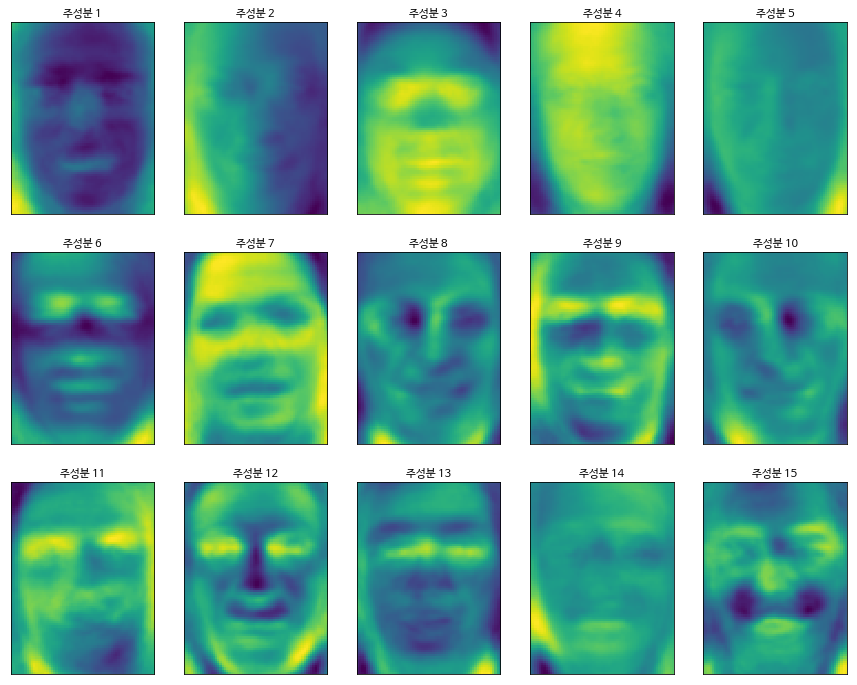

In [32]:
print("pca.components_.shape", pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {"xticks" : (), "yticks" : ()})
for i, (components, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(components.reshape(image_shape), cmap = "viridis")
    ax.set_title("주성분 {}".format(i + 1), fontproperties = fontprop_1)

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 5.9s, 0.1min


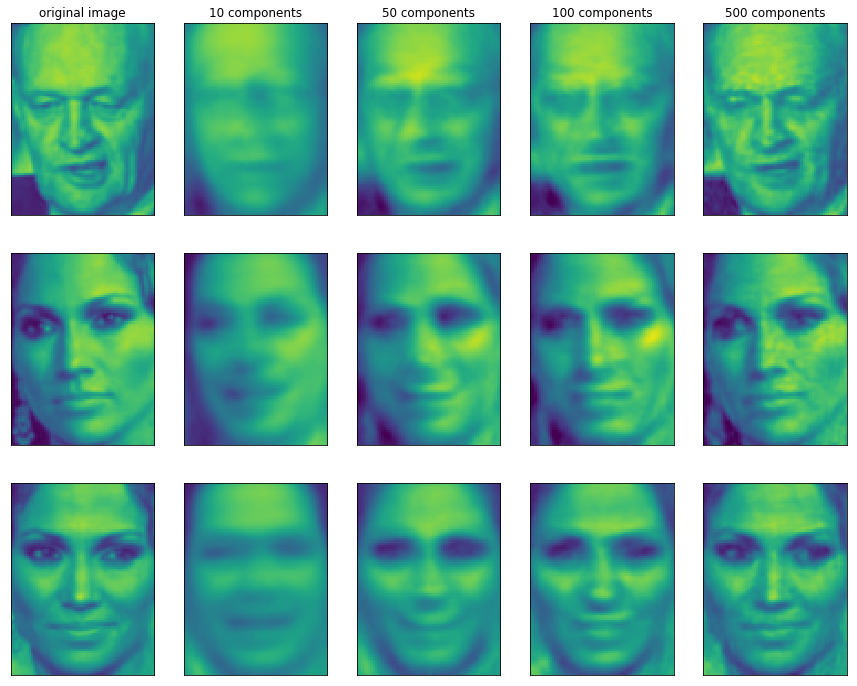

In [33]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '2nd component')

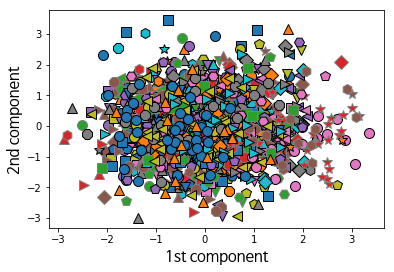

In [39]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:, 1], y_train)
plt.xlabel("1st component", fontproperties = fontprop)
plt.ylabel("2nd component", fontproperties = fontprop)